# Sharpe Ratio
* Represents both risk and return
## Formula
* SR=R(p)-R(i)/Standard deviation
* need to understand portflio return, risk free return, standard deviation of portfolio (risk)

In [1]:
import pandas as pd
import pandas_datareader as pdr
import csv
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import datetime as dt

In [2]:
tickers=['AAPL','MSFT','TWTR','IBM']
start=dt.datetime(2022,1,1)
data=pdr.get_data_yahoo(tickers,start)

In [3]:
data

Attributes   Adj Close                                          Close  \
Symbols           AAPL        MSFT       TWTR         IBM        AAPL   
Date                                                                    
2021-12-31  176.838242  334.136932  43.220001  128.862701  177.570007   
2022-01-03  181.259918  332.577057  42.660000  131.157272  182.009995   
2022-01-04  178.959457  326.874359  40.849998  133.066223  179.699997   
2022-01-05  174.199158  314.326324  39.500000  133.259048  174.919998   
2022-01-06  171.291183  311.842529  39.590000  130.482407  172.000000   
...                ...         ...        ...         ...         ...   
2022-10-10  140.419998  229.250000  50.360001  117.750000  140.419998   
2022-10-11  138.979996  225.410004  50.070000  117.800003  138.979996   
2022-10-12  138.339996  225.750000  49.939999  117.570000  138.339996   
2022-10-13  142.990005  234.240005  50.340000  121.790001  142.990005   
2022-10-14  138.380005  228.559998  50.450001  120.040001  138.380005   

Attributes                                           High              ...  \
Symbols           MSFT       TWTR         IBM        AAPL        MSFT  ...   
Date                                                                   ...   
2021-12-31  336.320007  43.220001  133.660004  179.229996  339.359985  ...   
2022-01-03  334.750000  42.660000  136.039993  182.880005  338.000000  ...   
2022-01-04  329.010010  40.849998  138.020004  182.940002  335.200012  ...   
2022-01-05  316.380005  39.500000  138.220001  180.169998  326.070007  ...   
2022-01-06  313.880005  39.590000  135.339996  175.300003  318.700012  ...   
...                ...        ...         ...         ...         ...  ...   
2022-10-10  229.250000  50.360001  117.750000  141.889999  234.559998  ...   
2022-10-11  225.410004  50.070000  117.800003  141.350006  229.059998  ...   
2022-10-12  225.750000  49.939999  117.570000  140.360001  227.860001  ...   
2022-10-13  234.240005  50.340000  121.790001  143.589996  236.100006  ...   
2022-10-14  228.559998  50.450001  120.040001  144.520004  237.240005  ...   

Attributes        Low                    Open                         \
Symbols          TWTR         IBM        AAPL        MSFT       TWTR   
Date                                                                   
2021-12-31  43.180000  133.610001  178.089996  338.510010  44.340000   
2022-01-03  42.480000  133.630005  177.830002  335.350006  43.500000   
2022-01-04  40.360001  135.899994  182.630005  334.829987  42.849998   
2022-01-05  39.450001  137.880005  179.610001  325.859985  40.799999   
2022-01-06  38.689999  132.509995  172.699997  313.149994  39.500000   
...               ...         ...         ...         ...        ...   
2022-10-10  49.500000  117.040001  140.419998  233.050003  49.660000   
2022-10-11  49.810001  116.940002  139.899994  227.619995  50.029999   
2022-10-12  49.810001  117.199997  139.130005  225.399994  50.009998   
2022-10-13  49.520000  115.550003  134.990005  219.850006  49.799999   
2022-10-14  50.299999  119.839996  144.309998  235.539993  50.490002   

Attributes                   Volume                                     
Symbols            IBM         AAPL        MSFT        TWTR        IBM  
Date                                                                    
2021-12-31  134.000000   64062300.0  18000800.0   9829600.0  3362100.0  
2022-01-03  134.070007  104487900.0  28865100.0  14431900.0  4605900.0  
2022-01-04  136.100006   99310400.0  32674300.0  21422400.0  7300000.0  
2022-01-05  138.309998   94537600.0  40054300.0  22008600.0  8956900.0  
2022-01-06  138.199997   96904000.0  39646100.0  16613400.0  9908100.0  
...                ...          ...         ...         ...        ...  
2022-10-10  119.790001   74899000.0  29743600.0  22272400.0  5990000.0  
2022-10-11  117.459999   77033700.0  30474000.0  11626800.0  4043100.0  
2022-10-12  118.000000   70433700.0  21903900.0  11827800.0  3338800.0  

In [4]:
data.head()

Attributes   Adj Close                                          Close  \
Symbols           AAPL        MSFT       TWTR         IBM        AAPL   
Date                                                                    
2021-12-31  176.838242  334.136932  43.220001  128.862701  177.570007   
2022-01-03  181.259918  332.577057  42.660000  131.157272  182.009995   
2022-01-04  178.959457  326.874359  40.849998  133.066223  179.699997   
2022-01-05  174.199158  314.326324  39.500000  133.259048  174.919998   
2022-01-06  171.291183  311.842529  39.590000  130.482407  172.000000   

Attributes                                           High              ...  \
Symbols           MSFT       TWTR         IBM        AAPL        MSFT  ...   
Date                                                                   ...   
2021-12-31  336.320007  43.220001  133.660004  179.229996  339.359985  ...   
2022-01-03  334.750000  42.660000  136.039993  182.880005  338.000000  ...   
2022-01-04  329.010010  40.849998  138.020004  182.940002  335.200012  ...   
2022-01-05  316.380005  39.500000  138.220001  180.169998  326.070007  ...   
2022-01-06  313.880005  39.590000  135.339996  175.300003  318.700012  ...   

Attributes        Low                    Open                         \
Symbols          TWTR         IBM        AAPL        MSFT       TWTR   
Date                                                                   
2021-12-31  43.180000  133.610001  178.089996  338.510010  44.340000   
2022-01-03  42.480000  133.630005  177.830002  335.350006  43.500000   
2022-01-04  40.360001  135.899994  182.630005  334.829987  42.849998   
2022-01-05  39.450001  137.880005  179.610001  325.859985  40.799999   
2022-01-06  38.689999  132.509995  172.699997  313.149994  39.500000   

Attributes                   Volume                                     
Symbols            IBM         AAPL        MSFT        TWTR        IBM  
Date                                                                    
2021-12-31  134.000000   64062300.0  18000800.0   9829600.0  3362100.0  
2022-01-03  134.070007  104487900.0  28865100.0  14431900.0  4605900.0  
2022-01-04  136.100006   99310400.0  32674300.0  21422400.0  7300000.0  
2022-01-05  138.309998   94537600.0  40054300.0  22008600.0  8956900.0  
2022-01-06  138.199997   96904000.0  39646100.0  16613400.0  9908100.0  

[5 rows x 24 columns]

In [5]:
data=data['Adj Close']

In [6]:
data

Symbols,AAPL,MSFT,TWTR,IBM
Date,,,,
2021-12-31,176.838242,334.136932,43.220001,128.862701
2022-01-03,181.259918,332.577057,42.660000,131.157272
2022-01-04,178.959457,326.874359,40.849998,133.066223
2022-01-05,174.199158,314.326324,39.500000,133.259048
2022-01-06,171.291183,311.842529,39.590000,130.482407
...,...,...,...,...
2022-10-10,140.419998,229.250000,50.360001,117.750000
2022-10-11,138.979996,225.410004,50.070000,117.800003
2022-10-12,138.339996,225.750000,49.939999,117.570000


In [7]:
portfolio = [.25,.15,.40,.20]

In [8]:
np.sum(portfolio)

1.0

In [9]:
np.sum(np.log(data/data.shift()),axis=1)

Date
2021-12-31    0.000000
2022-01-03    0.024625
2022-01-04   -0.058974
2022-01-05   -0.098262
2022-01-06   -0.043548
                ...   
2022-10-10   -0.004516
2022-10-11   -0.032551
2022-10-12   -0.007663
2022-10-13    0.113220
2022-10-14   -0.069609
Length: 199, dtype: float64

In [10]:
np.log(data/data.shift())*portfolio

Symbols,AAPL,MSFT,TWTR,IBM
Date,,,,
2021-12-31,NaN,NaN,NaN,NaN
2022-01-03,0.006174,-0.000702,-0.005217,0.003530
2022-01-04,-0.003193,-0.002594,-0.017342,0.002890
2022-01-05,-0.006740,-0.005872,-0.013442,0.000290
2022-01-06,-0.004209,-0.001190,0.000910,-0.004211
...,...,...,...,...
2022-10-10,0.000588,-0.003230,0.009484,-0.001809
2022-10-11,-0.002577,-0.002534,-0.002310,0.000085
2022-10-12,-0.001154,0.000226,-0.001040,-0.000391


In [11]:
log_return=np.sum(np.log(data/data.shift()),axis=1)

In [12]:
log_return

Date
2021-12-31    0.000000
2022-01-03    0.024625
2022-01-04   -0.058974
2022-01-05   -0.098262
2022-01-06   -0.043548
                ...   
2022-10-10   -0.004516
2022-10-11   -0.032551
2022-10-12   -0.007663
2022-10-13    0.113220
2022-10-14   -0.069609
Length: 199, dtype: float64

<IPython.core.display.Javascript object>


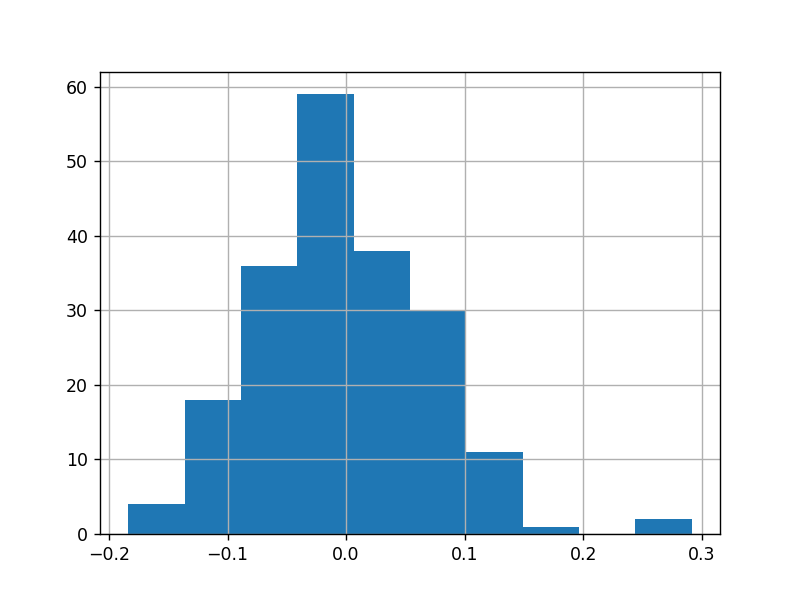

<AxesSubplot:>

In [13]:
fig,ax=plt.subplots()
log_return.hist()

In [24]:
log_return.std()

0.0706369822171097

In [25]:
log_return.mean()

-0.0027197341784301813

In [26]:
sharpe_ratio= log_return.mean()/log_return.std()

In [27]:
sharpe_ratio

-0.03850297808690087

In [28]:
asr=sharpe_ratio*255**0.5

In [29]:
asr

-0.6148432540069818

In [30]:
weight=np.random.random(4)
weight/=weight.sum()

In [31]:
weight


array([0.38614005, 0.06586138, 0.03627525, 0.51172333])

In [32]:
log_return2=np.sum(np.log(data/data.shift())*weight,axis=1)

In [33]:
log_return2

Date
2021-12-31    0.000000
2022-01-03    0.017787
2022-01-04   -0.000250
2022-01-05   -0.013467
2022-01-06   -0.017715
                ...   
2022-10-10   -0.004279
2022-10-11   -0.005085
2022-10-12   -0.002777
2022-10-13    0.033532
2022-10-14   -0.021598
Length: 199, dtype: float64

In [34]:
sharpe_ratio2=log_return2.mean()/log_return2.std()

In [35]:
sharpe_ratio2

-0.05008760789550262

In [36]:
asr2=sharpe_ratio2*255**.5

In [37]:
asr2

-0.7998349570360577